<a href="https://colab.research.google.com/github/manuel103/Machine-Learning/blob/master/Trial_2_Grp_Wk_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from mpl_toolkits.mplot3d import  Axes3D

In [3]:
from google.colab import files
files.upload()

Saving train_data.csv to train_data.csv


{'train_data.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd

In [0]:
data = pd.read_csv('train_data.csv', header=0)
# data.info()
data.tail()

In [0]:
new_data = data.drop(columns=['Id', 'SalePrice'], axis=1)
all_features = (new_data.columns)


In [0]:
categorical_data = data.select_dtypes(include=['object']).copy()
categorical_features = list(categorical_data.columns)

In [0]:
nominal = ['MSZoning', 'LotConfig', 'LandContour', 'Neighborhood', 'RoofStyle', 'Functional', 'SaleType']
ordinal = list(set(categorical_features) - set(nominal))
numerical = list(set(all_features) - set(categorical_features))
target = ['SalePrice']

In [0]:
for feature in categorical_features:
  categorical_data[feature] = categorical_data[feature].astype('category')
for feature in ordinal:
  categorical_data[feature] = categorical_data[feature].cat.codes
categorical_data.head()

In [0]:
data_copy=categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1) 
data_copy.drop(nominal,axis=1,inplace=True)
#data_copy
new_data = pd.concat([data_copy,data[numerical],data[target]],axis=1)
new_data

In [0]:
all_features = (new_data.columns)
X = new_data.loc[:, all_features].values
y = new_data.loc[:,['SalePrice']].values

print(all_features)
y

In [0]:
X = StandardScaler().fit_transform(X)
print(X)

In [0]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(np.nan_to_num(X))
pca_data = pd.DataFrame(pc_s, columns=['PC1','PC2'])
final_data = pd.concat([pca_data, data[target]],axis=1)
final_data

In [35]:
pca.explained_variance_ratio_

array([0.09075606, 0.0388855 ])

In [39]:
final_data_to_array = np.array(final_data)
final_data_to_array

array([[ 2.14492289e+00, -1.58411537e+00,  2.08500000e+05],
       [ 4.13939575e-01,  2.19829672e+00,  1.81500000e+05],
       [ 2.88307893e+00, -8.65302511e-01,  2.23500000e+05],
       ...,
       [ 1.40725573e+00,  3.19736534e-01,  2.66500000e+05],
       [-2.78267395e+00,  2.81382262e+00,  1.42125000e+05],
       [-1.20868291e+00,  1.87224990e+00,  1.47500000e+05]])

In [0]:
minimum = np.min(final_data_to_array, axis=0)
maximum = np.max(final_data_to_array, axis=0)
X, Y = np.meshgrid(np.linspace(minimum[0], maximum[0], 20), np.linspace(minimum[1], maximum[1], 20))
# print(X, Y)

In [0]:
'''
fit the training data to regressor
'''
regressor = LassoCV()
train_data = np.c_[final_data_to_array[:, 0], final_data_to_array[:, 1]]
regressor.fit(train_data, final_data_to_array[:, 2])

# calculating eigen values
w_1 = regressor.coef_[0]# 1st PC score
w_2 = regressor.coef_[1]# 2nd PC score
b = regressor.intercept_
Z = w_1*X + w_2*Y+b# matrix of principal components scores (n × m)


Text(0.5, 0, 'House Price')

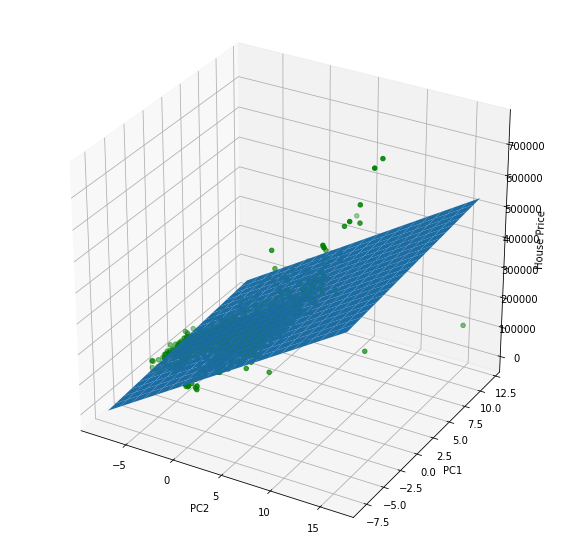

In [81]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(final_data_to_array[:, 0], final_data_to_array[:, 1], final_data_to_array[:, 2], color='green')
ax.plot_surface(X, Y, Z)

plt.xlabel('PC2')
plt.ylabel('PC1')
ax.set_zlabel('House Price')
